In [ ]:
# Notebook for debugging the pipline

In [ ]:
from config import log_filepath
from pipeline import Pipeline

base_path_linux = "/home/chris/gdrive"
base_path_mac = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD"
json_path = base_path_linux + "/work/annabell/experiments/23/data_sets/nyc_squad_with_pretraining_commands.jsonl"

pipeline = Pipeline(prepared_dataset_filepath=json_path)
pipeline.load_prepared_dataset()
#pipeline.run_pre_training_evaluation_testing()
#pipeline.run_evaluate_pre_training_results()
#pipeline.generate_pre_training_data()


In [ ]:
#count the number of rows in the data frame that have an error in the created commands column
def count_errors_in_df(the_dataframe):
    the_dataframe['created_commands_error'] = the_dataframe['created_commands'].apply(
        lambda x: "# There was an error generating commands for this pre-training sample." in x)
    error_count = the_dataframe['created_commands_error'].sum()
    print("Number of rows with errors in created_commands:", error_count)

In [ ]:
#find the row with id = "56d4eb762ccc5a1400d8334f"
dataframe = pipeline.datasetPreProcessor.dataset
dataframe[dataframe[
              'question'] == "After what movie portraying Etta James, did Beyonce create Sasha Fierce?"]

In [7]:
import pandas as pd

fp = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/sandbox_v2/data_sets/nyc_squad_with_pretraining_commands.jsonl"

df = pd.read_json(fp, lines=True)
count_errors_in_df(df)
df


Number of rows with errors in created_commands: 3


,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining,created_commands,created_commands_error
0,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ is in front of the N...,a copper statue of Christ,a copper statue of Christ be in front of the N...,? what be in front of the Notre_Dame Main Buil...,a copper statue of Christ,Subject-Verb-Object,Subject-Verb-Object,True,"[#id: 5733be284776f4190066117f, a copper statu...",False
1,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at Notre Dame...,the Main Building,the Basilica of the Sacred Heart at Notre_Dame...,? the Basilica of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Object-Complement,Subject-Verb-Object,True,"[#id: 5733be284776f41900661180, the Basilica o...",False
2,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame is a Marian place of ...,a Marian place of prayer and reflection,the Grotto at Notre_Dame be a marian place of ...,? what be the Grotto at Notre_Dame,a marian place of prayer and reflection,Subject-Verb-Object,Subject-Verb-Object,False,[# This is a non-pretraining sample. No comman...,False
3,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary sits on top...,a golden statue of the Virgin Mary,a golden statue of the Virgin_Mary sit on top ...,? what sit on top of the Main_Building at Notr...,a golden statue of the Virgin_Mary,Subject-Verb-Object,Subject-Verb-Object,True,"[#id: 5733be284776f4190066117e, a golden statu...",False
4,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,The daily student paper at Notre Dame is calle...,The Observer,the daily student paper at Notre_Dame be call ...,? what be the daily student paper at Notre_Dam...,the Observer,Subject-Verb-Object,Subject-Verb-Object,False,[# This is a non-pretraining sample. No comman...,False
5,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,There are three student newspapers at Notre Dame.,three,there be three student newspaper at Notre_Dame,? how many student news paper be find at Notre...,three,Subject-Verb-Object,Subject-Verb-Object,True,"[#id: 5733bf84d058e614000b61bd, there be three...",False
6,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,the student paper Common Sense began publicati...,1987,the student paper Common Sense begin publicati...,? in what_year do the student paper Common Sen...,1987,Subject-Verb-Object,Subject-Verb-Object,False,[# This is a non-pretraining sample. No comman...,False
7,5733bed24776f4190066118a,University_of_Notre_Dame,The university is the major seat of the Congre...,What is the oldest structure at Notre Dame?,the oldest structure at Notre Dame is Old College,Old College,the old structure at Notre_Dame be Old_College,? what be the old structure at Notre_Dame,Old_College,Subject-Verb-Object,Subject-Verb-Object,False,[# This is a non-pretraining sample. No comman...,False
8,5733bed24776f4190066118b,University_of_Notre_Dame,The university is the major seat of the Congre...,What individuals live at Fatima House at Notre...,The individuals who live at Fatima House at No...,Retired priests and brothers,the individual who live at Fatima

In [3]:
df[df['id'] == "5733a6424776f41900660f50"]

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining,created_commands
14,5733a6424776f41900660f50,University_of_Notre_Dame,The College of Engineering was established in ...,How many departments are within the Stinson-Re...,the number of departments within the Stinson-R...,five,the number of department within the Stinson - ...,? how many department be within the Stinson - ...,five,Subject-Verb-Object,Subject-Verb-Object,False,[# This is a non-pretraining sample. No comman...


In [ ]:
pipeline.run_pre_training()
pipeline.run_pre_training_evaluation_testing()
pipeline.run_evaluate_pre_training_results()
pipeline.run_training()
pipeline.run_testing()
pipeline.run_evaluate_training_results()

2026-01-09 13:25:21,261 - pipeline - INFO - Starting pre-training...
2026-01-09 13:25:21,287 - dataset_processing - INFO - Wrote /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/15/pre_training/nyc_squad_pretraining_commands.txt
2026-01-09 13:25:21,289 - dataset_processing - INFO - Number of reward lines: 467
2026-01-09 13:25:21,289 - dataset_processing - INFO - Number of commands: 8080
2026-01-09 13:25:21,292 - training - INFO - copied: /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/15/pre_training/nyc_squad_pretraining_commands.txt to: /Users/chris/PycharmProjects/Training-and-evaluating-cognitive-language-models/docker/shared_data/pre_training
2026-01-09 13:25:21,297 - training - INFO - Running Docker command from directory: /Users/chris/PycharmProjects/Training-and-evaluati

In [20]:
import os
from annabell_utilities import AnnabellLogfileInterpreter

log_dir = "/home/chris/gdrive/work/annabell/experiments/sandbox/logs"
log_filename = "annabell_pre_training_log.txt"
log_filepath = os.path.join(log_dir, log_filename)
interpreter = AnnabellLogfileInterpreter(log_filepath)
interpreter.parse_entries()

FileNotFoundError: [Errno 2] No such file or directory: '/home/chris/gdrive/work/annabell/experiments/sandbox/logs/annabell_pre_training_log.txt'

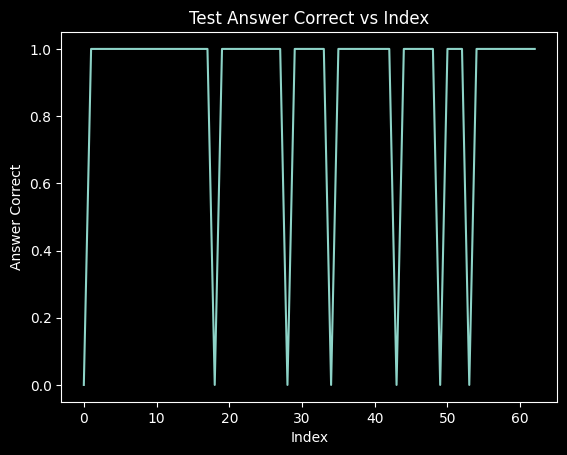

In [13]:
#plot a graph showing "test_answer_correct" vs index
import matplotlib.pyplot as plt
import pandas as pd


def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"])
    plt.xlabel("Index")
    plt.ylabel("Answer Correct")
    plt.title("Test Answer Correct vs Index")
    plt.show()


df_25 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/25/pre_training/results/test_detailed_results_tsv',
    sep='\t')
plot_test_answer_correct(df_25)

In [21]:
from annabell_utilities import AnnabellLogfileInterpreter

log_filepath = '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/sandbox/logs/annabell_pre_training_log.txt'
interpreter = AnnabellLogfileInterpreter(log_filepath)
interpreter.parse_entries()

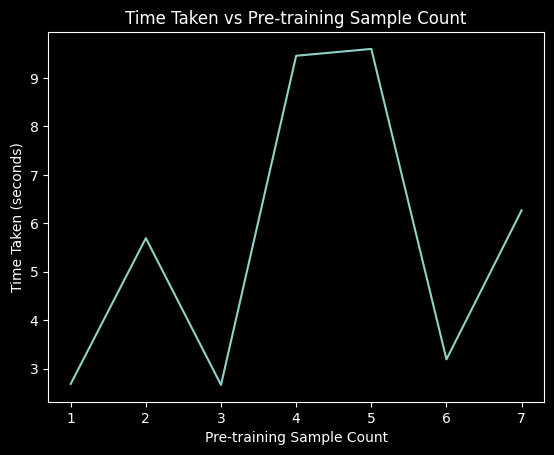

In [25]:
#using the logfile intepreter, plot a graph of the time taken for each pre-training sample vs the count of the sample
import matplotlib.pyplot as plt


def plot_time_taken_vs_sample_count(the_interpreter):
    sample_counts = []
    time_taken = []
    for entry in the_interpreter.entries:
        sample_counts.append(entry.sample_number())
        time_taken.append(entry.time())
    plt.plot(sample_counts, time_taken)
    plt.xlabel("Pre-training Sample Count")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken vs Pre-training Sample Count")
    plt.show()


plot_time_taken_vs_sample_count(interpreter)
